## 使用Scala解释器


In [ ]:
1+2

## 定义变量
这里msg的类型是推断出来的(type inference)，能够推算出那些不显示指定的类型。

当scala能够帮推断类型的时候，通常来说我们最好让它帮我们推断类型，而不是在代码中到处写上那些不必要的，显示的类型标注。

当然也可以显示的给出类型，既可以确保Scala推断出来符合你意图的类型，也能作为文档。

In [ ]:
val msg = "Hello, world!"

val msg2: java.lang.String = "Hello again, world!"

//在Scala中，java.lang中的类型在Scala中可以直接用简称引用
val msg3: String = "Hello yet again, world!"

## 定义函数
函数定义以def开始，函数名是max，它接收两个Int型的参数，返回一个Int型的参数

In [ ]:
def max(x:Int,y:Int): Int = {
    if(x > y)
        x
    else
        y
}
max(1,2)

## 使用while循环及if判断

In [ ]:
def whiletest(args: Array[String]): Unit = {
    var i = 0
    while(i < args.length){
        if(i!=0)
            print(" ")
        print(args(i))
        i +=1
    }
    println()
}
val args = Array("Scala","is","fun")
whiletest(args)

## 使用foreach和for遍历，以及函数字面量
### 函数字面量
(x:Int,y:Int) => 
圆括号重视函数的参数(x:Int,y:Int)，用=>与函数体x + y连接

In [ ]:
val args = Array("Scala","is","fun")

println("==============foreach test===============")
def foreachtest(args: Array[String]): Unit = {
    //arg => println(arg)是函数字面量(function literal),该匿名函数接收一个名为arg的参数，函数体为println(arg)
    println("Test0:")
    args.foreach(arg => println(arg))
    //参数可以指定类型，但是需要抱在圆括号里(arg: String)
    println("Test1:")
    args.foreach((arg: String) => println(arg))
    //利用特殊规则，如果函数字面量只是一个接收单个参数的语句,如例子中的println，可以不必给出参数名和参数本身
    println("Test2:")
    args.foreach(println)
}

foreachtest(args)

println("==============for test===============")
def fortest(args: Array[String]): Unit = {
    println("Test0:")
    //arg <- args,<-可以念做里的，for(arg <- args)读起来就像：对args里的arg，执行...
    //<- 的右边时我们熟知的数组，左边时一个val变量的名字，注意它不是var
    //尽管arg看起来像var，因为每次循环的时候都会拿到新的值，但它确实是个val,arg不能在for循环体内被重新赋值
    //实际情况是，对应args中的每个元素，一个新的名字为arg的val就会被创建出来，初始化成元素的值，这是for表达式的循环体才会被执行
    for(arg <- args){
        //arg = 1
        println(arg)
    }
        
}
fortest(args)

## 类型参数化数组
参数化的意思是在创建实例时对实例做“配置”，做法时在构造方法的括号中传入对象参数。  

**重要概念：**val本身不能被重新赋值，但它指向的对象是有可能发生改变的，如示例中的greetStrings(0)/(1)/(2)，***scala使用圆括号()访问数组***     
**scala另一个通行的规则：**如果一个方法只接收一个参数，在调用它的时候，可以不适用英文句点或圆括号。本例中to是个接收Int参数的方法，代码0 to 2 会被转化成(0).to(2)，这种方法仅在显式给出方法的目标对象时才有效。不能写"print 10"，但可以写"Console print 10"。


In [ ]:
//用“12345”对BigInteger进行参数化
val big = new java.math.BigInteger("12345")
//用类型参数化,先是[]中的类型，然后才是()括号中的值（参数）
val greetStrings = new Array[String](3)
greetStrings(0) = "Hello"
greetStrings(1) = ", "
greetStrings(2) = "world!\n"
for(i <- 0 to 2)
    print(greetStrings(i))
for(i <- (0).to(2))
    print(greetStrings(i))
//更明确的表达你的意图
val greetStrings2 : Array[String] = new Array[String](3)

print(10)
//print 10 //will fail
Console print 10

## 工厂方法apply的调用
Scala从技术上讲没有操作符重载(operator overloading)，因为它实际上没有传统意义上的操作符。类似+、-、*、/这样的字符可以被用作方法名。因此，当你在scala解释器键入1+2时，实际上是调用了Int对象1上名为+的方法
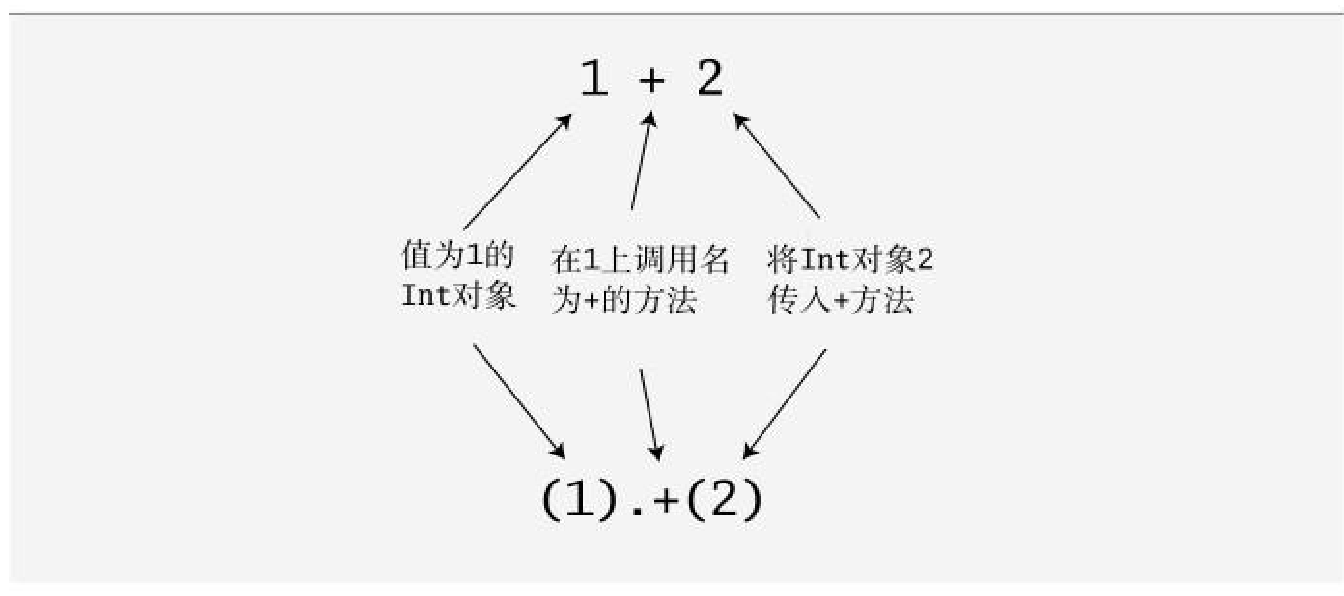

In [ ]:
val numNames = Array("zero","one","two")
//同样是调用apply，但更啰嗦的写法如下,apply接收一个变长参数列表
val numNames2 = Array.apply("zero","one","two")

## 使用列表
scala的数组是一个拥有相同类型的对象的可变序列。例如Array[String]中智能包含字符串。虽然无法在数组实例化以后改变其长度，但可以改变它的元素值。因此，数组是可变的对象。
对于相同类型对象的不可变序列的场景，可以使用scala的List类。跟数组类似，一个List[String]只能包含字符串，但是不可改变其对象的值。
scala的List被设计为允许函数式编程的风格。

In [ ]:
val oneTwo = List(1,2)//不需要写new List，因为scala.List的伴生对象上定义了一个工厂方法"List.apply()"
oneTwo(0)
//oneTwoThree(0) = 2 //fail
val threeFour = List(3,4)
val oneTwoThreeFour = oneTwo ::: threeFour
println(oneTwo + " and " + threeFour + "were not mutated.")
println("Thus, " + oneTwoThreeFour + "is a new list.")

//cons ::，往列表的头部追加元素
//::是右操作元(right operand，即twoThree这个列表)的方法
val twoThree = List(2,3)
val oneTwoThree = 1 :: twoThree
println(oneTwoThree)
val oneTwoThree1 = 1 :: 2 :: 3 :: Nil
println(oneTwoThree1)

//append :+，往列表尾部增加元素，不建议这么用，在尾部增加元素的耗时会随着列表的长度增加而增加，可以使用::再reverse列表也可以用ListBuffer
val twoThreeFour = twoThree :+ 4

### 列表的常用方法

In [ ]:
//空列表
List()
Nil

In [ ]:
//创建一个新的List[String]，包含三个元素:"cool"、"tools"、"rule"
List("cool","tools","rule")

In [ ]:
//创建一个新的List[String]，包含三个元素:"will"、"fill"、"until"
val thrill = List("will","fill","until")

In [ ]:
//列表拼接
List("a","b") ::: List("c","d")

In [ ]:
//返回列表thrill中下标为2（从0开始计数）的元素
thrill(2)

In [ ]:
//thrill中长度为4的字符串进行计数
thrill.count(s => s.length == 4)

In [ ]:
//返回去掉thrill头两个元素的列表
thrill.drop(2)

In [ ]:
//返回去掉thrill后两个元素的列表
thrill.dropRight(2)

In [ ]:
//判断thrill中是否有值为"until"的元素
thrill.exists(s => s=="until")

In [ ]:
//按顺序返回thrill列表中长度是4的元素列表
thrill.filter(s => s.length==4)

In [ ]:
//按顺序返回thrill列表中长度不是4的元素列表
thrill.filterNot(s => s.length==4)

In [ ]:
//判断thrill中是否所有元素都以"l"结尾
thrill.forall(s => s.endsWith("l"))

In [ ]:
//打印每个元素
thrill.foreach(s => print(s))

In [ ]:
//打印每个元素第二种方法
thrill.foreach(print)

In [ ]:
//返回首个元素
thrill.head

In [ ]:
//返回最后一个元素
thrill.last

In [ ]:
//返回除了最后一个元素外的其他元素
thrill.init

In [ ]:
//返回除了第一个元素外的其他元素
thrill.tail

In [ ]:
//判断列表thrill是否是空列表
thrill.isEmpty

In [ ]:
//列表thrill长度
thrill.length

In [ ]:
//对列表中所有的元素末尾怎加"y"
thrill.map(s => s+"y")

In [ ]:
//组合列表中所有的元素，用", ”连接
thrill.mkString(", ")

In [ ]:
//返回thrill的逆序
thrill.reverse

In [ ]:
//以首字母大小排序列表
thrill.sortWith((s,t) => s.charAt(0).toLower < t.charAt(0).toLower)

## 使用元组
另一个有用的容器对象是元组（tuple）。跟list类似，元组也是不可变的，不过跟list不同的是，**元组可以容纳不同类型的元素**。列表可以是List[Int]或List[String]，而元组可以同时包含整数和数组。当你需要从方法返回多个对象时，元组非常有用。在Java中遇到类似情况通常会创建一个类似JavaBean那样的类来承载多个返回值，而用Scala可以简单地返回一个元组。元组用起来很简单：要实例化一个新的元组，只需要将对象放在圆括号当中，用逗号隔开即可。一旦实例化好一个元组，可以用英文句点、下画线和从1开始的序号来访问每一个元素。

In [ ]:
val pair = (99,"Luftballons")
println(pair._1)
println(pair._2)

### 访问元组中的元素
你也许正好奇为什么不能像访问列表元素，也就是“pair（0）”那样访问元组的元素。背后的原因是列表的apply方法永远只返回同一种类型，但元组里的元素可以是不同类型的：_1可能是一种类型，_2可能是另一种，等等。这些_N表示的字段名是从1开始而不是从0开始的，这是由其他同样支持静态类型元组的语言设定的传统，比如Haskell和ML。

## 使用集和映射
由于Scala想让你同时享有函数式和指令式编程风格的优势，其集合类库特意对可变和不可变的集合进行了区分。举例来说，数组永远是可变的，列表永远是不可变的。Scala同时还提供了集（set）和映射（map）的可变和不可变的不同选择，但使用同样的简单名字。对于集和映射而言，Scala通过不同的类继承关系来区分可变和不可变版本。   
例如，Scala的API包含了一个基础的特质（trait）来表示集，这里的特质跟Java的接口定义类似（将在第12章了解到更多关于特质的内容）。在此基础上，Scala提供了两个子特质（subtrait），一个用于表示可变集，另一个用于表示不可变集。  
在图3.2中可以看到，这三个特质都叫作Set。不过它们的完整名称并不相同，因为它们分别位于不同的包。Scala API中具体用于表示集的类，比如图3.2中的HashSet类，分别扩展自可变或不可变的特质Set。（在Java中“实现”某个接口，而在Scala中“扩展”或者“混入”特质）。因此，如果想要使用一个HashSet，可以根据需要选择可变或不可变的版本。  
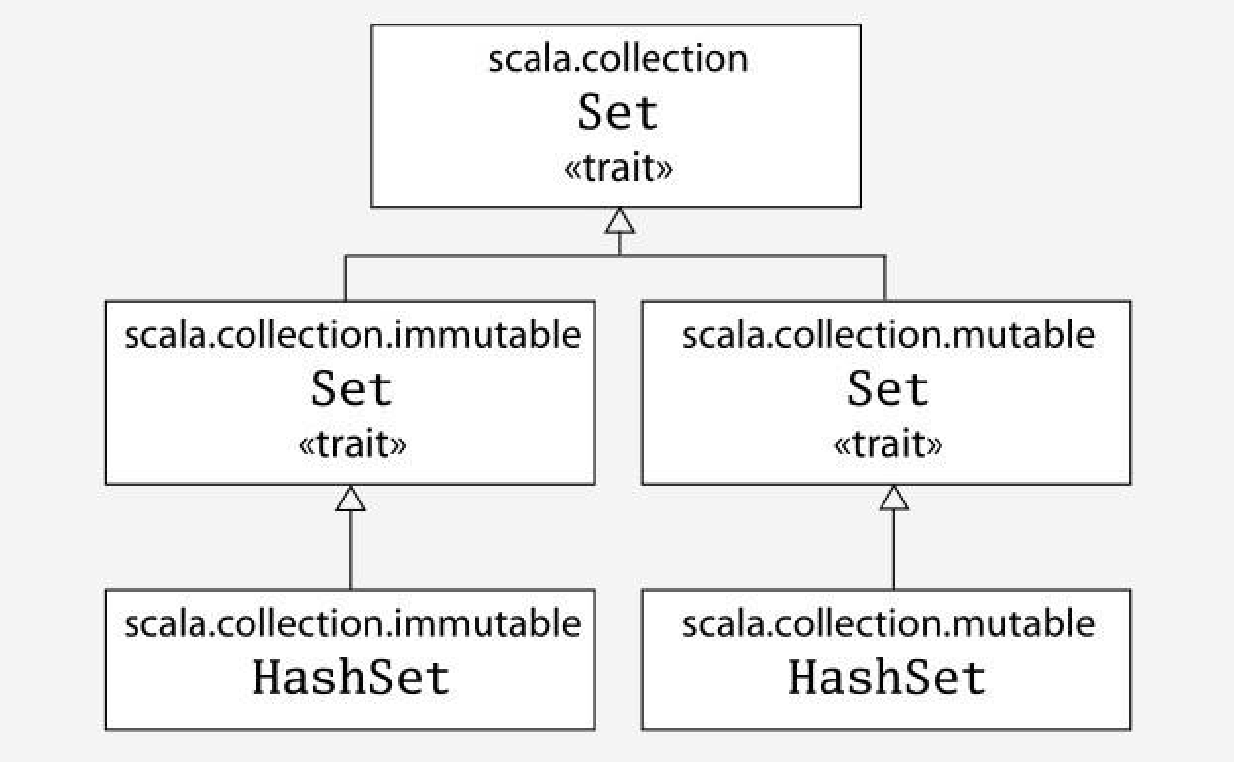

In [ ]:
var jetSet = Set("Boeing", "Airbus")
jetSet += "Lear"
jetSet = jetSet + "Lear2"
println(jetSet.contains("Cessna"))

在示例3.5的第一行，定义了一个新的名为jetSet的var，将其初始化成一个包含两个字符串，＂Boeing＂和＂Airbus＂的不可变集。如这段代码所示，在Scala中可以像创建列表和数组那样创建集：通过调用Set伴生对象的名为apply的工厂方法。在示例3.5中，实际上调用了scala.collection. immutable.Set的伴生对象的apply方法，返回一个默认的、不可变的Set的对象。Scala编译器推断出jetSet的类型为不可变的Set[String]。

要向集添加新元素，可以对集调用+方法，传入这个新元素。不论是可变的还是不可变的集，+方法都会创建并返回一个新的包含了新元素的集。在示例3.5中，处理的是一个不可变的集。可变集提供了一个实际的+=方法，不可变集并不直接提供这个方法。

因此，在上述例子第二行，实际上是将jetSet这个var重新赋值成了一个包含＂Boeing＂、＂Aribus＂和＂Linear＂的新集。

如果你想要的是一个可变集，需要做一次引入（import）：

In [ ]:
import scala.collection.mutable
val  movieSet = mutable.Set("Hitch","Poltergeist")
//val  movieSet = Set("Hitch","Poltergeist")
movieSet += "Shrek"
println(movieSet)

在示例3.6的第一行，引入了可变的S e t。跟Java类似，import语句让你在代码中使用简单名字，比如Set，而不是更长的完整名。这样一来，当你在第三行用到Set的时候，编译器知道你指的是scala.collection.mutable. Set。在那一行，将movieSet初始化成一个新的包含字符串＂Hitch＂和＂Poltergeist＂的新的可变集。接下来的一行通过调用集的+=方法将＂Shrek＂添加到可变集里。前面我们提到过，+=实际上是一个定义在可变集上的方法。只要你想，也完全可以不用 movieSet += ＂Shrek＂这样的写法，而是写成movieSet.+=（＂Shrek＂）。[6]

尽管由可变和不可变Set的工厂方法生产出来的默认集的实现对于大多数情况来说都够用了，偶尔可能也需要一类特定的集。幸运的是，语法上面并没有大的不同。只需要简单地引入你需要的类，然后使用其伴生对象上的工厂方法即可。例如，如果需要一个不可变的HashSet，可以:

In [ ]:
import scala.collection.immutable.HashSet
val hashSet = HashSet("Tomatoes","Chilies")
print(hashSet + "Coriander")

Scala的另一个有用的集合类是Map。跟集类似，Scala也提供了Map的可变和不可变的版本，用类继承关系来区分。如图3.3所示，映射（map）的类继承关系跟集的类继承关系很像。在scala.collection包里有一个基础的Map特质，还有两个子特质，都叫Map，可变的那个位于scala.collection.mutable，而不可变的那个位于scala.collection.immutable。
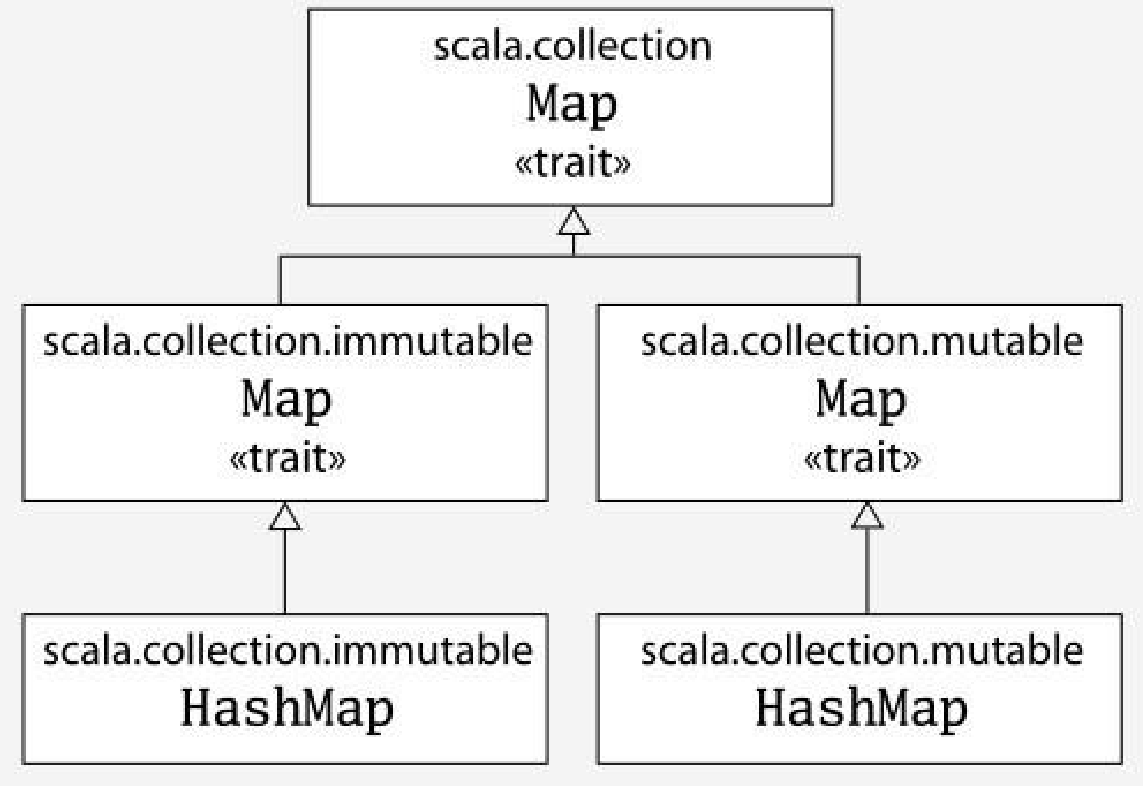

In [ ]:
import scala.collection.mutable
val treasureMap = mutable.Map[Int,String]()
treasureMap += (1 -> "Go to island")
treasureMap += (2 -> "Find Big X on ground.")
treasureMap += (4 -> "Dig.")
println(treasureMap(4))

示例3.7展示了一个可变映射的具体例子。在示例3.7的第一行，引入了可变的Map特质。接下来定义了一个名为treasureMap的val，并初始化成一个空的，包含整数键和字符串值的可变Map。这个映射之所以是空的，是因为没有向工厂方法传入任何内容（在代码“Map[Int, String]（）”中圆括号是空的）。[7]在接下来的几行，通过->和+=方法向映射添加键值对（key/value pair）。正如我们前面演示过的，Scala编译器会将二元（binary）的操作，比如1 -> ＂Go to island.＂，转换成标准的方法调用，即（1）.->（＂Go to island.＂）。因此，当你写1-> ＂Go to island.＂时，实际上是对这个值为1的整数调用->方法，传入字符串＂Go to island.＂。可以在Scala的任何对象上调用这个->方法，它将返回包含键和值两个元素的元组。[8]然后将这个元组传给treasureMap指向的那个映射对象的+=方法。最后一行将打印出treasureMap中键2对应的值。

如果你更倾向于使用不可变的映射，则不需要任何引入，因为**默认的映射就是不可变的**。

In [ ]:
val romanNumeral = Map(
    1->"I",2->"II",3->"III",4->"IV",5->"V"
)
println(romanNumeral(3))

## 识别函数式编程风格
正如第1章提到的，Scala允许采用指令式编程，但鼓励采用函数式编程风格。如果你之前的编程背景是指令式的（比方说你是个Java程序员）那么当你学习Scala时的一个主要挑战是搞明白如何使用函数式风格编程。我们意识到这个风格可能对你来说一开始并不熟悉，本书将致力于引导你做出这个转变。这也需要你自己的努力，我们鼓励你这样做。如果你之前更多的是采用指令式的编程风格，我们相信学习函数式编程不仅能让你成为更好的Scala程序员，同样还能帮助你拓展视野，成为更好的程序员。

首先是从代码层面识别出两种风格的差异。一个显著的标志是如果代码包含任何var变量，它通常是指令式风格的；而如果代码完全没有var（也就是说代码只包含val），那么它很可能是函数式的。因此，一个向函数式风格转变的方向是尽可能不用var。

如果你之前用的是指令式的编程语言，比如Java、C++或C#，你可能认为var是常规的变量而val是特例。而如果你之前更多使用函数式编程，比如Haskell、OCaml或Erlang，你可能会认为val是常规的变量而var简直是对编程的亵渎。在Scala看来，val和var不过是你的工具箱中两种不同的工具，都有相应的用途，没有哪一个本质上是邪恶的。Scala鼓励你更偏向于使用val，但最终要根据手里的工作选择最适用的工具。就算你认同这个平衡的观点，你仍可能在一开始难以想明白如何从你的代码中去掉var。

In [ ]:
val args = Array("AA","BB")
//指令式风格
def printArgs0(args : Array[String]): Unit={
    var i = 0
    while(i<args.length){
        println(args(i))
        i += 1
    }
}
printArgs0(args)
//函数式风格
def printArgs1(args : Array[String]): Unit={
    for(arg <- args)
        println(arg)
}
printArgs1(args)
//或者
def printArgs2(args : Array[String]): Unit={
    args.foreach(println)
}
printArgs2(args)

这个例子展示了编程中使用更少的var的好处。经过重构的（更函数式的）代码，跟原始的（更指令式的）代码相比，更清晰、更精简，也更少出错。Scala鼓励使用函数式风格的原因就是这样能帮助你实现更易读、更少出错的代码。

不过你可以走得更远。重构后的printArgs方法并不是“纯”的函数式代码，因为它有副作用（本例中它的副作用是向标准输出流打印）。带有副作用的函数的标志性特征是结果类型为Unit。如果一个函数并不返回任何有意义的值，也就是Unit这样的结果类型所表达的意思，那么这个函数存在于世上唯一的意义就是产生某种副作用。函数式编程的做法是定义一个将传入的args作为格式化（用于打印）的方法，但只是返回这个格式化的字符串，如示例3.9所示：

现在你真的实现了函数式编程：没有副作用，也没有var。mkString方法可以被用于任何可被迭代访问的集合（包括数组、列表、集和映射），返回一个包含了对所有元素调用toString的结果的字符串，以传入的字符串分隔。因此，如果args包含三个元素＂zero＂、＂one＂和＂two＂,formatArgs将返回＂zero\none\ntwo＂。当然，这个函数实际上并不像printArgs那样打印出任何东西，但是可以很容易地将它的结果传给println来达到这个目的：

In [ ]:
val args = Array("AA","BB")
def formatArgs(args: Array[String]) = args.mkString("\n")
println(formatArgs(args))

每个有用的程序都会有某种形式的副作用。否则，它对于外部世界就没有任何价值。倾向于使用无副作用的函数鼓励你设计出将带有副作用的代码最小化的程序。这样做的好处之一是让你的程序更容易测试。
例如，要测试本节给出的三个printArgs方法，需要重新定义println，捕获传给println的输出，确保它是你预期的样子。而要测试formatArgs则很简单，只需要检查它的结果即可：

In [ ]:
val res = formatArgs(args)
assert(res=="AA\nBB")
//assert(res=="AA")

Scala的assert方法检查传入的Boolean，如果是false，则抛出AssertionError。如果传入的Boolean是true,assert就安静地返回。你将在第14章了解到更多关于断言（assertion）和测试的内容。

尽管如此，请记住v a r或副作用从本质上讲并不邪恶。Scala并不是一门纯函数式编程语言，强制你只能用函数式风格来编程。Scala是指令式/函数式混合（hybrid）编程语言。你会发现有些场景下对于要解决的问题而言指令式更为适合，这个时候不要犹豫，使用指令式的风格就好。为了让你学习如何不使用var完成编程任务，我们将在第7章向你展示许多具体的用到var的代码示例，并告诉你如何将这些var转换成val。

### Scala程序员的平衡心态

倾向于使用val、不可变对象和没有副作用的方法，优先选择它们。不过当你有特定的需要和理由时，也不要拒绝var、可变对象和带有副作用的方法。

## 从文件读取文本行
那些执行小的日常任务的脚本通常需要处理文件中的文本行。在本节，你将构建一个脚本，从文件读取文本行，并将它们打印出来，在每一行前面带上当前行的字符数。脚本的第一版如示例3.10所示：

这段脚本首先引入scala.io包的名为Source的类。然后检查是不是命令行至少给出了一个参数。如果是，第一个参数将被当作需要打开并处理的文件名。表达式Source.fromFile（args（0））尝试打开指定的文件并返回一个Source对象，在这个对象上，继续调用getLines方法。getLines方法返回一个Iterator[String]，每次迭代都给出一行内容，去掉了最后的换行符。for表达式遍历这些文本行，对于每一行，都打印出它的长度、一个空格和这一行本身的内容。如果在命令行没有给出参数，那么最后的else子句将会向标准错误流（standard error stream）打印一段消息。如果将这段代码放在名为countchars1.scala的文件中并对该文件本身执行：

In [ ]:
import scala.io.Source
def countChars(args:Array[String]) : Unit = (
    if(args.length >0){
        for(line <- Source.fromFile(args(0)).getLines())
            println(line.length + " " + line)
    }
    else
        Console.err.println("Please enter filename")
)
countChars(Array("./build.sbt"))

尽管这段脚本，在当前的这个版本，已经能打印出需要的信息，可能还希望（右）对齐这些数字并加上一个管道符号（|），这样输出就可以是：

要做到这一点，可以对这些文本行遍历两次。第一次遍历，将决定每一行的字符数所需要的最大宽度。第二次遍历，将利用前一次遍历算出来的最大宽度，打印输出结果。由于要遍历两次，完全可以将文本行赋值给一个变量：

最后的toList是必需的，因为getLines方法返回的是一个迭代器（iterator）。一旦完成遍历，迭代器就会被消耗掉。通过toList将它转换成列表，就可以随便遍历这些文本行，多少次都可以，但相应的代价是需要在内存中同时存储所有行。因此，变量lines指向一个包含了命令行指定的文件内容的字符串列表。接下来，由于你需要用到两次计算字符数的逻辑，每次迭代都会做一遍，可以将这个表达式抽取出来成为一个函数，计算传入字符串的长度：

有了这个函数，就可以像这样计算最大宽度：

这里用一个for表达式来遍历每一行，计算该行的长度，如果比当前已知的最大值更大，则赋值给maxWidth，这个被初始化成0的var（max方法可以被用于任何Int，返回被调用的和被传入的两个Int值中更大的那一个）。或者，如果你更喜欢不用var来找出最大值，可以用如下代码找到最长的文本行：

reduceLeft方法将传入的函数应用到lines的头两个元素，然后继续将这个传入的函数应用到前一步得到的值和lines中的下一个元素，直到遍历完整个列表。在每一步，结果都是截止当前最长的行，因为传入的函数（a, b）=> if （a.length > b.length） a else b返回两个字符串中较长的那一个。“reduceLeft”将返回传入函数的最后一次执行的结果，在本例中就是lines所包含的元素中最长的那个字符串。
有了这个结果，就可以计算出需要的最大宽度，方法是将最长的行传入widthOfLength：

剩下的事情就是用正确的格式打印出这些行了。

在这个for表达式里，再次遍历这些行。对于每一行，首先计算出需要放在行长度之前的空格数，赋值给numSpaces。然后创建一个包含了数量为numSpaces的空格的字符串。最后，打印出按要求格式化好的信息。整个脚本如示例3.11所示

In [ ]:
import scala.io.Source
def widthOfLength(s: String) = s.length.toString.length

def countChars1(args:Array[String]) : Unit = {
    //var maxWidth = 0
    val lines = Source.fromFile(args(0)).getLines().toList
    //for(line <- lines)
    //    maxWidth = maxWidth.max(widthOfLength(line))
    val longestLine = lines.reduceLeft(
        (a,b) => if(a.length > b.length) a else b
    )
    val maxWidth = widthOfLength(longestLine)
    
    if(args.length >0){
        for(line <- lines){
            val numSpaces = maxWidth - widthOfLength(line)
            val padding = " " * numSpaces
            println(padding + line.length + " | " + line)        
        }

    }
    else
        Console.err.println("Please enter filename")
}
countChars1(Array("./build.sbt"))